<a href="https://colab.research.google.com/github/vick998/Banzae-py/blob/main/Cheatsheet3_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'a':[4,5,6],'b':[7,8,9],'c':[10,11,12]},index=[1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [3]:
df1 = pd.DataFrame([[4,7,10],[5,8,11],[6,9,12]],index=[1,2,3],columns=['a','b','c'])
df1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [4]:
index = pd.MultiIndex.from_tuples([('x','d',1),('x','d',2),('x','e',2)],names=['s','n','v'])
df2 = pd.DataFrame({'a':[4,5,6],'b':[7,8,9],'c':[10,11,12]},index=index)
df2

a  b   c
s n v          
x d 1  4  7  10
    2  5  8  11
  e 2  6  9  12

In [5]:
df3 = pd.DataFrame([[4,7,float('NAN')],[5,float('NAN'),float('NAN')],[float('NAN'),float('NAN'),float('NAN')]],index=[1,2,3],columns=['A','B','C'])
df3

,A,B,C
1,4.0,7.0,NaN
2,5.0,NaN,NaN
3,NaN,NaN,NaN


In [105]:
df11=pd.concat([df,df1])
df11.melt().melt().value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  


variable  value
variable  a        6
          b        6
          c        6
value     4        2
          5        2
          6        2
          7        2
          8        2
          9        2
          10       2
          11       2
          12       2
dtype: int64

In [19]:
df11.melt().value.nunique()

9

In [21]:
df11.a.nunique()

3

In [23]:
df.describe()

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


In [25]:
df11.a.sum()

30

In [28]:
df11.a.mean()

5.0

In [29]:
df11.a.apply(lambda x: x/5)

1    0.8
2    1.0
3    1.2
1    0.8
2    1.0
3    1.2
Name: a, dtype: float64

In [32]:
df11.a.median()

5.0

In [33]:
df11.a.min()

4

In [34]:
df11.a.max()

6

In [35]:
df11.a.quantile()

5.0

In [36]:
df11.a.var()

0.8

In [37]:
df11.a.std()

0.8944271909999159

In [104]:
df11.a = df11.a.apply(lambda x: x/5)
df11

,level_0,a,b,c
0,0,0.8,7,10
1,1,1.0,8,11
2,2,1.2,9,12
3,3,0.8,7,10
4,4,1.0,8,11
5,5,1.2,9,12


In [42]:
df3.dropna()

,A,B,C


In [43]:
df3.fillna(3.0)

,A,B,C
1,4.0,7.0,3.0
2,5.0,3.0,3.0
3,3.0,3.0,3.0


In [45]:
len(df3)

3

In [50]:
df.assign(col=lambda df:df.a*df.b)

,a,b,c,col
1,4,7,10,28
2,5,8,11,40
3,6,9,12,54


In [54]:
df['col2']=df.a*df.b*df.c
df

,a,b,c,col2
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


In [67]:
df=df.drop(columns='col2')

In [64]:
pd.qcut(df.a,7,labels=False)

1    0
2    3
3    6
Name: a, dtype: int64

In [69]:
df.max(axis=1)

1    10
2    11
3    12
dtype: int64

In [73]:
df.min(axis=1)

1    4
2    5
3    6
dtype: int64

In [75]:
df.clip(lower=6,upper=10)

,a,b,c
1,6,7,10
2,6,8,10
3,6,9,10


In [83]:
df.expanding(2).sum()

,a,b,c
1,NaN,NaN,NaN
2,9.0,15.0,21.0
3,15.0,24.0,33.0


In [77]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [106]:
df11 = df11.reset_index()
df11 = df11.drop(columns='index')
df11


,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12
3,4,7,10
4,5,8,11
5,6,9,12


In [109]:
df11.rolling(3).sum()

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,15.0,24.0,33.0
3,15.0,24.0,33.0
4,15.0,24.0,33.0
5,15.0,24.0,33.0


In [111]:
df11.expanding(3).sum()

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,15.0,24.0,33.0
3,19.0,31.0,43.0
4,24.0,39.0,54.0
5,30.0,48.0,66.0


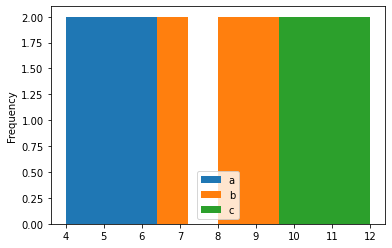

In [115]:
df11.plot.hist()

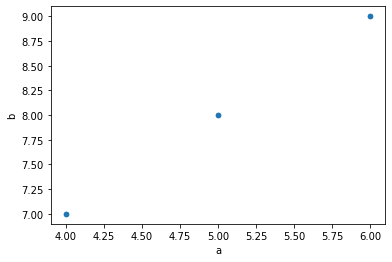

In [119]:
df11.plot.scatter(x='a',y='b')

In [129]:
df12 = pd.concat([df1,df3])
df12.groupby(by=['a','b']).size()

a    b  
4.0  7.0    1
5.0  8.0    1
6.0  9.0    1
dtype: int64

In [133]:
df12.groupby(by='a').agg(lambda x: x%2==0)

,b,c,A,B,C
a,,,,,
4.0,False,True,False,False,False
5.0,True,False,False,False,False
6.0,False,True,False,False,False


In [136]:
df12.groupby(level=0).size()

1    2
2    2
3    2
dtype: int64